# MNIST & CIFAR-10 - An Analysis of True Living Dimension

In this notebook, we analyze the dimension of the images of two popular Machine Learning (ML) image datasets: MNIST handwritten digits & CIFAR-10. Our goal is to understand the **true living space of these two high-dimensional datasets**. 


## MNIST
The MNIST (Modified National Institute of Standards and Technology) dataset contains 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents.

Each image is **grayscale** 28 x 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).

## CIFAR-10
The CIFAR-10 (Canadian Institute For Advanced Research) dataset contains 60,000 images of 10 different classes: airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

Each image is **RGB (color)** with 32 x 32 x 3 pixels.


- While the images of the MNIST dataset are "normalized" (centered and similar background), the images of the CIFAR-10 dataset has a lot of variations.


## Tasks

For this analysis, we perform two tasks.

- Task 1: Compare Grayscale and RGB Images via Pixel-level Visualization

- Task 2: True Living Space Analysis: MNIST & CIFAR-10 


## Summary of Observations



We will see that although the MNIST image dimension is 784 (28 x 28), only a small fraction of the pixels are non-zero. A large majority of the pixel locations, which constitute the background, are zeros. All images share the same background.

- Therefore, the true living space of MNIST images is low-dimensional.



On the other hand, in CIFAR-10 imges all pixel locations have non-zero values. By analyzing the background of the CIFAR-10 images, we find that the background of the images vary. It indicates that the images occupy the entire pixel space, i.e., images are 3072-dimensional (32 x 32 x 3).

- Therefore, the true living space of CIFAR-10 images is high-dimensional.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import downscale_local_mean

from tensorflow import keras

## Task 1: Compare Grayscale and RGB Images via Pixel-level Visualization

First, let's introduce the notion of grayscale and RGB images.

### Grayscale Image

A grayscale image is a kind of black-and-white or gray monochrome. It is composed exclusively of shades of gray. In a grayscale image, the value of each pixel is a single sample representing only an amount/intensity of light. The contrast ranges from black at the weakest intensity to white at the strongest.

More fundamentally, a "gray" color is one in which the red (R), green (G) and blue (B) color components all have equal intensity in RGB space. Thus, it is only necessary to specify a single intensity value for each pixel, as opposed to the three intensities needed to specify each pixel in a full color RGB image.

Often, the grayscale intensity is stored as an 8-bit integer giving 256 possible different shades of gray from black to white. 

- A grayscale image is stored as a 2D matrix.


### RGB Image

A RGB image (also known as truecolor image) is composed of 3 color channels red, green and blue. These are the primary colors of light. Every color is made up of some combination of red, green and blue. For example, by mixing red and green we get yellow. Or, by mixing red and blue, we get magenta. For creating white, we need to mix all three colors together. And by removing all three colors completely, we get pure black.


A RGB image is stored as a 3D matrix that defines red, green, and blue color components for each individual pixel. Each layer of the matrix is a 2D matrix of red, green or blue pixel values. 

<img src="https://cse.unl.edu/~hasan/RGB-1.png" width=300, height=100>

The color of each pixel is determined by the combination of the red, green, and blue intensities stored in each color plane at the pixel's location. Graphics file formats store RGB images as 24-bit images, where the red, green, and blue components are 8 bits each. This yields a potential of 16 million colors. The precision with which a real-life image can be replicated has led to the commonly used term truecolor image.

A RGB array can be of class double, uint8, or uint16. In a RGB array of class double, each color component is a value between 0 and 1. A pixel whose color components are (0,0,0) displays as black, and a pixel whose color components are (1,1,1) displays as white. 

The three color components for each pixel are stored along the third dimension of the data array. For example, the red, green, and blue color components of the pixel (10,5) are stored in RGB(10,5,1), RGB(10,5,2), and RGB(10,5,3), respectively.

To determine the color of the pixel at (2,3), we would look at the RGB triplet stored in (2,3,1:3). Suppose (2,3,1) contains the value 0.5176, (2,3,2) contains 0.1608, and (2,3,3) contains 0.0627. The color for the pixel at (2,3) is

        0.5176 0.1608 0.0627


## Visualization: Grayscale Image

We visualize the pixel values of a grayscale image. Since it has only one channel, we display a 2D pixel matrix.

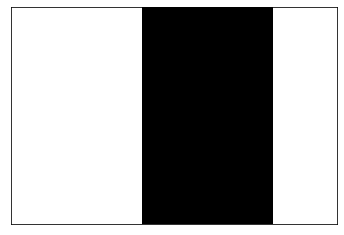

Shape of the Image Matrix:  (600, 900)


In [2]:
# Load a color (RGB) image as a grayscale image by getting only the first color channel
image_threeChannels = plt.imread("datasets/pics/RGB.png")[:,:,0] 
plt.gray()
plt.imshow(image_threeChannels)
plt.xticks(())
plt.yticks(())
plt.show()

print("Shape of the Image Matrix: ", image_threeChannels.shape)

## Downscale the Image for Visualizing the Pixel Values

For readibility of the individual pixel values, we downscale the image.

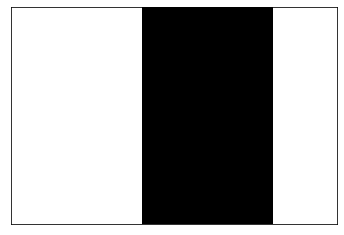

Shape of the Downscaled Image Matrix:  (20, 30)


In [3]:
image_threeChannels_downscaled = downscale_local_mean(image_threeChannels, (30, 30))

plt.imshow(image_threeChannels_downscaled)
plt.xticks(())
plt.yticks(())
plt.show()

print("Shape of the Downscaled Image Matrix: ", image_threeChannels_downscaled.shape)

## Function to Visualize the Image Pixel Values

We define a function to disply the pixel values on a selected channel of an image. 

- Larger pixel values are shaded in white.

In [4]:
# Visualize the image pixel values
def visualize_image(img, figSize_x, figSize_y, color_channel=None):
    fig = plt.figure(figsize = (figSize_x, figSize_y)) 
    if(color_channel != None):
        img = img[:, :, color_channel]
    plt.imshow(img, cmap='gray')
    plt.xticks(())
    plt.yticks(())
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            plt.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

## Grayscale Image: Visualize 2D Pixel Matrix

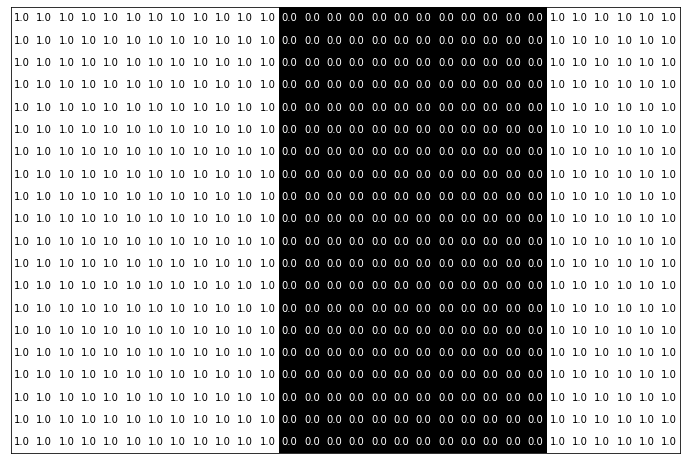

In [5]:
visualize_image(image_threeChannels_downscaled, 12, 12)

## Visualization: RGB Image

We visualize the pixel values of a RGB image. Since it has three channels, we display three 2D pixel matrices.

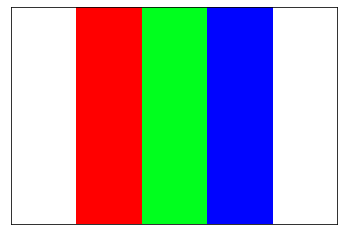

Shape of the Image Matrix:  (600, 900, 3)


In [6]:
image_threeChannels = plt.imread("datasets/pics/RGB.png")

plt.imshow(image_threeChannels)
plt.xticks(())
plt.yticks(())
plt.show()

print("Shape of the Image Matrix: ", image_threeChannels.shape)

## Downscale the Image for Visualizing the Pixel Values

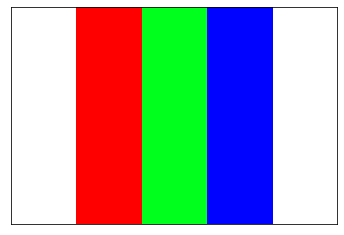

Shape of the Downscaled Image Matrix:  (20, 30, 3)


In [7]:
image_threeChannels_downscaled = downscale_local_mean(image_threeChannels, (30, 30, 1))

plt.imshow(image_threeChannels_downscaled)
plt.xticks(())
plt.yticks(())
plt.show()

print("Shape of the Downscaled Image Matrix: ", image_threeChannels_downscaled.shape)

## RGB Image: Visualize Three 2D Pixel Matrices

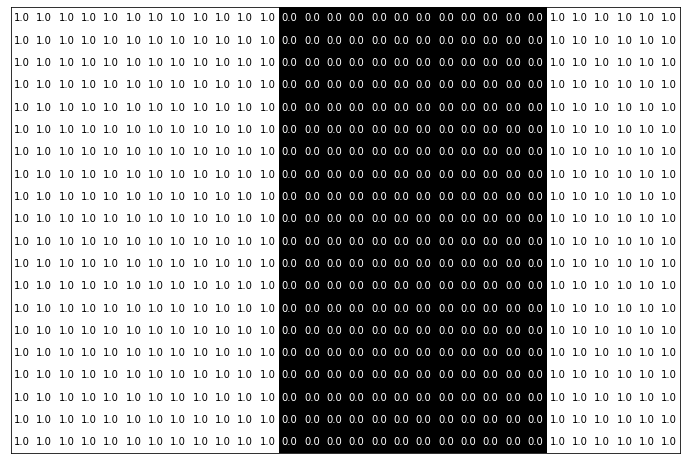

In [8]:
visualize_image(image_threeChannels_downscaled, 12, 12, color_channel=0)

## Red Channel

Above we see that the red channel pixels are activated. The green and blue channel pixels are all zeros.

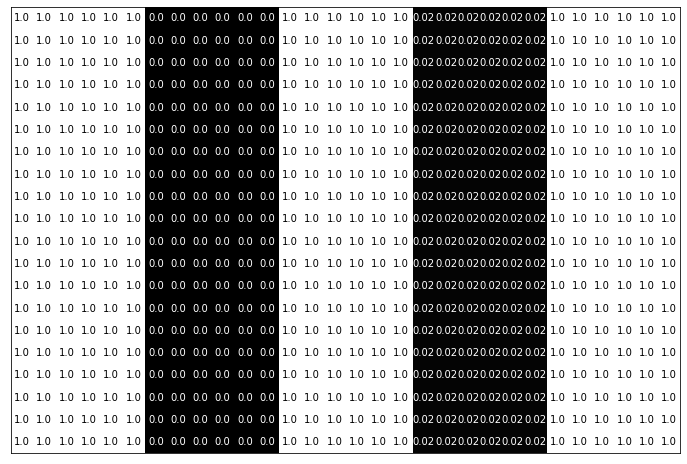

In [9]:
visualize_image(image_threeChannels_downscaled, 12, 12, color_channel=1)

## Green Channel

Above we see that the green channel pixels are activated. The red and blue channel pixels are all zeros.

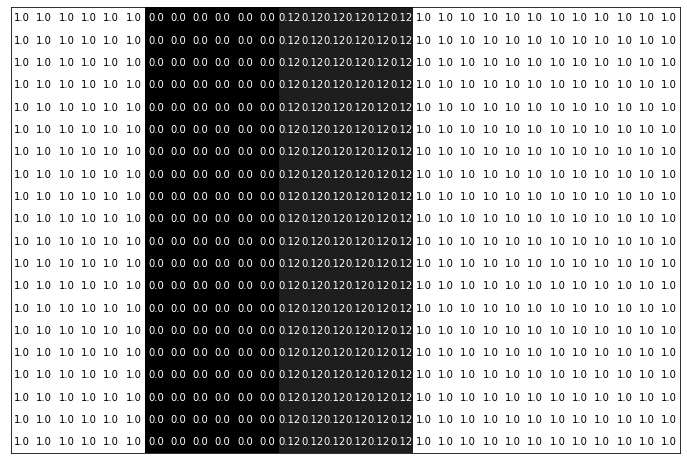

In [10]:
visualize_image(image_threeChannels_downscaled, 12, 12, color_channel=2)

## Blue Channel

Above we see that the blue channel pixels are activated. The red and green channel pixels are all zeros.

# Visualize Another RGB Image

In the above RGB image, the three primary colors are non-overlapping. In most of the RGB images, each pixel of an image is a combination of red, green and blue pixel values. 

To illustrate this, let's visualize another RGB image.

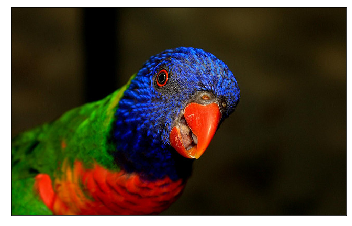

Shape of the Image Matrix:  (399, 640, 3)


In [11]:
image_bird = plt.imread("datasets/pics/bird.jpg")

image_bird  = image_bird/255.0

plt.imshow(image_bird)
plt.xticks(())
plt.yticks(())
plt.show()

print("Shape of the Image Matrix: ", image_bird.shape)

## Downscale the Image for Visualizing the Pixel Values

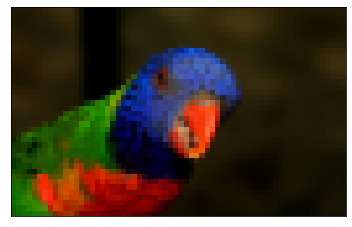

Shape of the Downscaled Image Matrix:  (40, 64, 3)


In [12]:
image_bird_downscaled = downscale_local_mean(image_bird, (10, 10, 1))

plt.imshow(image_bird_downscaled )
plt.xticks(())
plt.yticks(())
plt.show()

print("Shape of the Downscaled Image Matrix: ", image_bird_downscaled.shape)

## RGB Image: Visualize Three 2D Pixel Matrices

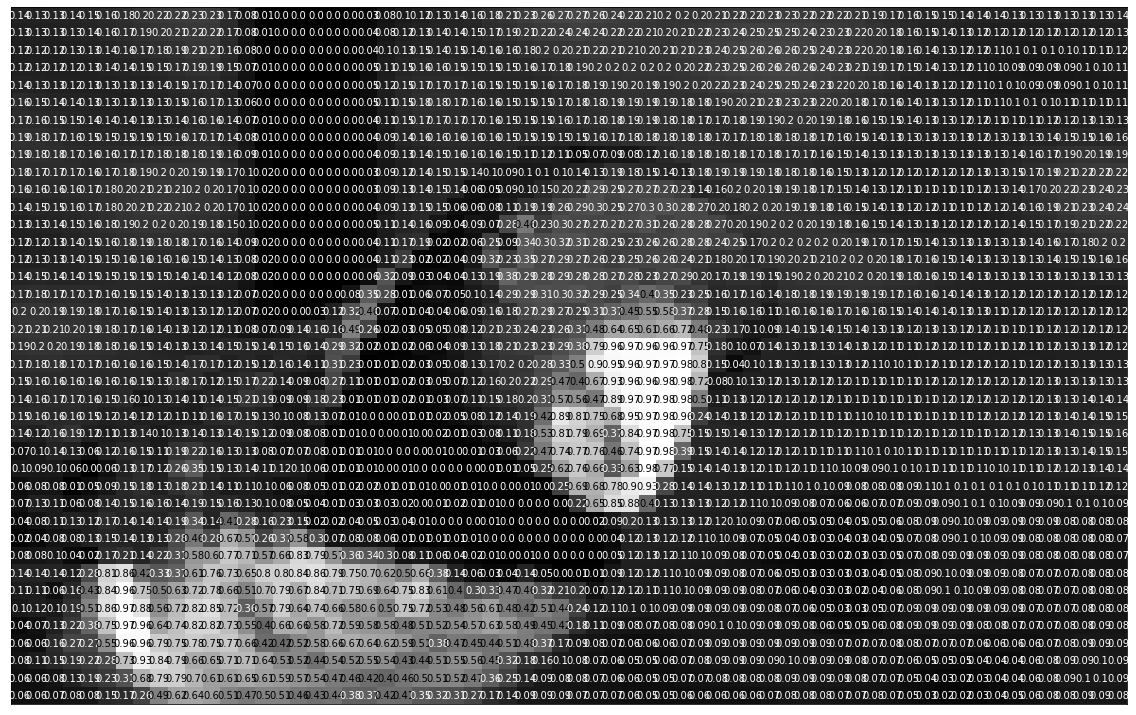

In [13]:
visualize_image(image_bird_downscaled, 20, 20, color_channel=0)

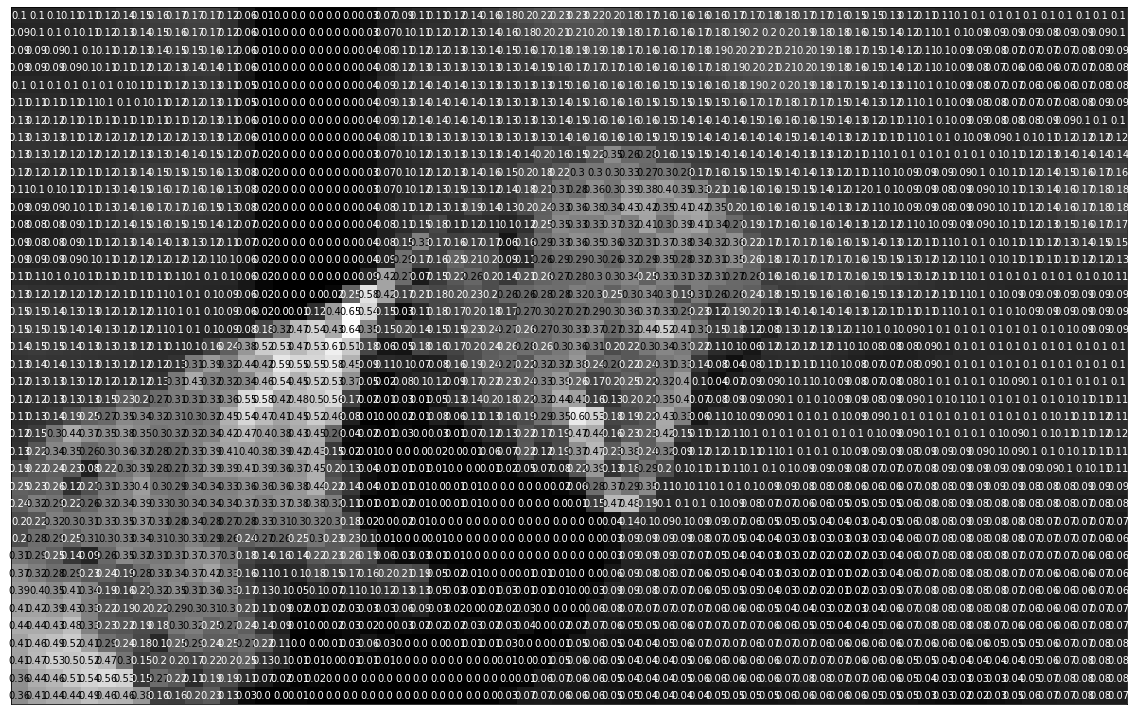

In [14]:
visualize_image(image_bird_downscaled, 20, 20, color_channel=1)

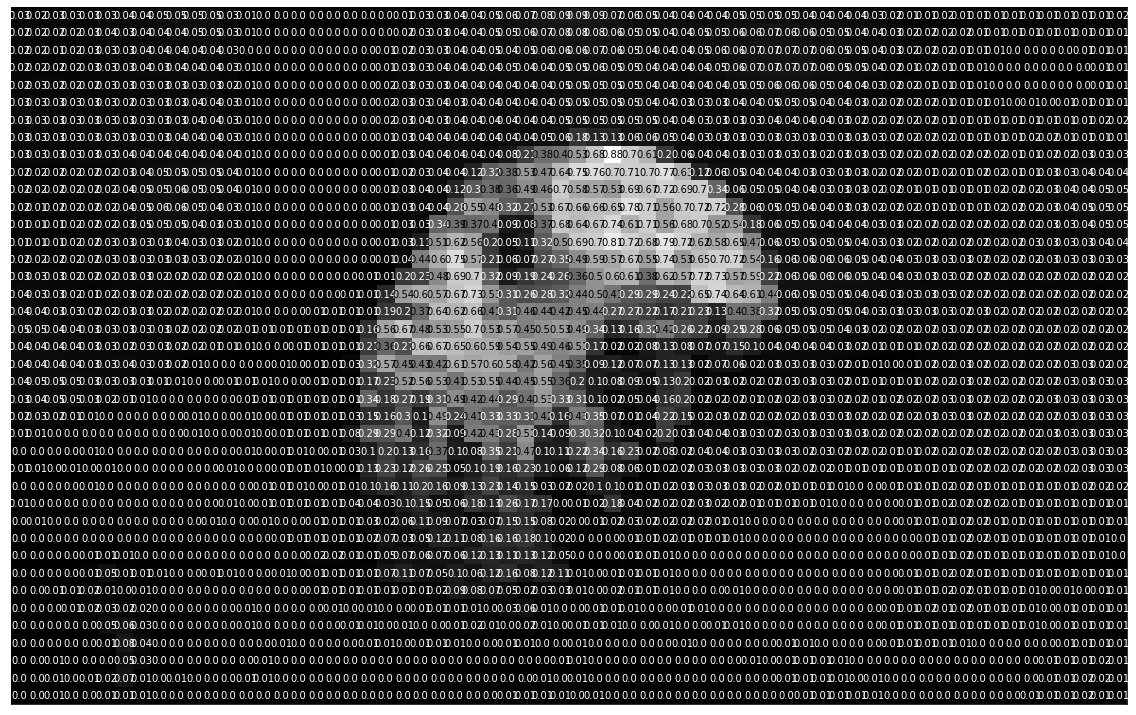

In [15]:
visualize_image(image_bird_downscaled, 20, 20, color_channel=2)

## Compare 3 Color Channels of a Small Location of the Image

For better understanding, let's focus on the 3 color channels of a small location of the image.

- Crop the image
- Visualize the three 2D pixel matrices side by side


### Crop the Image

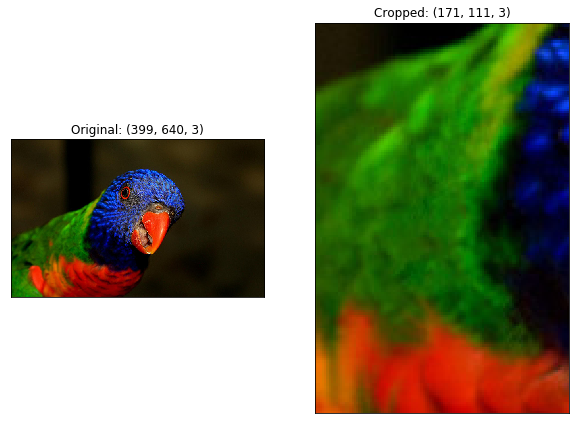

In [16]:
image_bird_cropped = image_bird[170:(170+171), 110:(110+111), :]

plt.figure(figsize = (10,10)) 

plt.subplot(121)
plt.imshow(image_bird, cmap='gray')
plt.xticks(())
plt.yticks(())
plt.title("Original: (%d, %d, %d)" % image_bird.shape)


plt.subplot(122)
plt.imshow(image_bird_cropped, cmap='gray')
plt.title("Cropped: (%d, %d, %d)" % image_bird_cropped.shape)
plt.xticks(())
plt.yticks(())
plt.show()

## Downscale the Cropped Image for Visualizing the Pixel Values

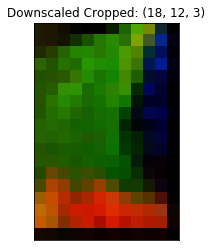

In [17]:
image_bird_cropped_downscaled = downscale_local_mean(image_bird_cropped, (10, 10, 1))

plt.imshow(image_bird_cropped_downscaled)
plt.title("Downscaled Cropped: (%d, %d, %d)" % image_bird_cropped_downscaled.shape)
plt.xticks(())
plt.yticks(())
plt.show()

## Function to Display the Three RGB 2D Pixel Matrices Side-by-Side

In [18]:
# Visualize the image pixel values
def visualize_image_three_channels(img, figSize_x, figSize_y):
    plt.figure(figsize = (figSize_x, figSize_y)) 
    img1 = img[:, :, 0]
    img2 = img[:, :, 1]
    img3 = img[:, :, 2]
    
    plt.subplot(131)
    plt.imshow(img1, cmap='gray')
    plt.xticks(())
    plt.yticks(())
    plt.title("Red")
    width, height = img1.shape
    thresh = img1.max()/2.5
    for x in range(width):
        for y in range(height):
            plt.annotate(str(round(img1[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img1[x][y]<thresh else 'black')
            
            
    plt.subplot(132)
    plt.imshow(img2, cmap='gray')
    plt.xticks(())
    plt.yticks(())
    plt.title("Green")
    width, height = img2.shape
    thresh = img2.max()/2.5
    for x in range(width):
        for y in range(height):
            plt.annotate(str(round(img2[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img2[x][y]<thresh else 'black')
            
            
    plt.subplot(133)
    plt.imshow(img3, cmap='gray')
    plt.xticks(())
    plt.yticks(())
    plt.title("Blue")
    width, height = img3.shape
    thresh = img3.max()/2.5
    for x in range(width):
        for y in range(height):
            plt.annotate(str(round(img3[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img3[x][y]<thresh else 'black')
            
    plt.show()

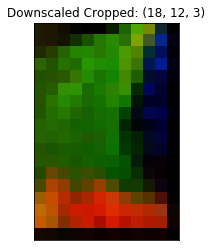

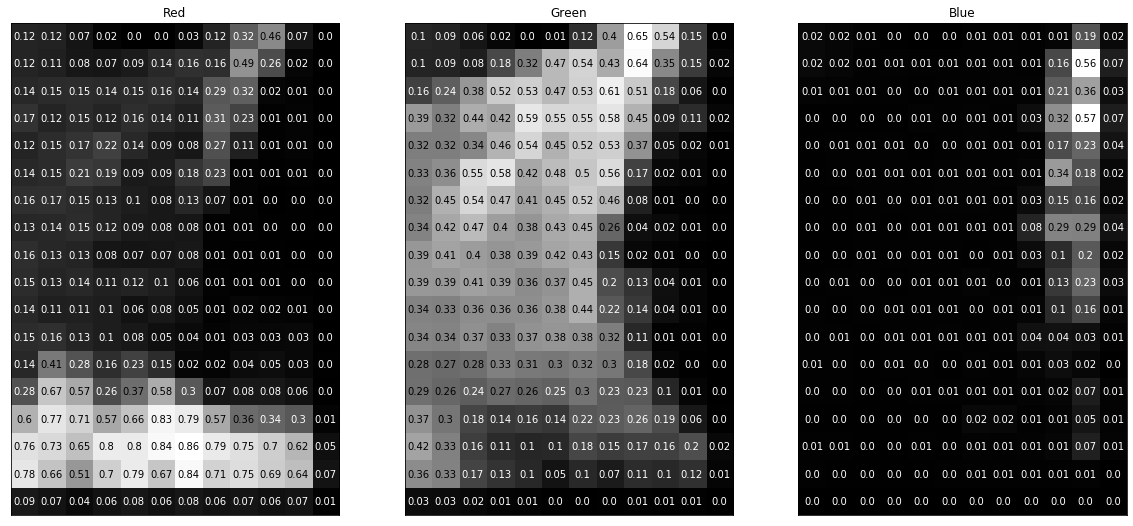

In [19]:
plt.imshow(image_bird_cropped_downscaled)
plt.title("Downscaled Cropped: (%d, %d, %d)" % image_bird_cropped_downscaled.shape)
plt.xticks(())
plt.yticks(())
plt.show()

visualize_image_three_channels(image_bird_cropped_downscaled, 20, 12)

## Display the RGB Values at an Arbitrary Location

Below we show the RGB pixel values at a coordinate of the image where the color is dominantly red.

We see that at the coordinate (16, 5), the red pixel value is 0.67, while the green and blue pixel values are 0.05 and 0.0, respectively.

Thus, there is practically no blue in this location and only a tiny amount of green. The vast majority of the color is coming from red.

In [20]:
print("Red Channel: Pixel Value at (16, 5) = %.2f" % image_bird_cropped_downscaled[16, 5, 0])
print("Green Channel: Pixel Value at (16, 5) = %.2f" % image_bird_cropped_downscaled[16, 5, 1])
print("Blue Channel: Pixel Value at (16, 5) = %.2f" % image_bird_cropped_downscaled[16, 5, 2])

Red Channel: Pixel Value at (16, 5) = 0.67
Green Channel: Pixel Value at (16, 5) = 0.05
Blue Channel: Pixel Value at (16, 5) = 0.00


## Task 2: True Living Space Analysis: MNIST & CIFAR-10 

To analyze the true living space of MNIST and CIFAR-10 images, we visualize the pixel matrices of two arbitrary images from these two datasets.

## MNIST: Load Dataset

In [21]:
mnist = keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("\nNo. of Training Samples: ", X_train.shape)
print("No. of Training Labels: ", y_train.shape)

print("\nNo. of Testing Samples: ", X_test.shape)
print("No. of Testing Labels: ", y_test.shape)


No. of Training Samples:  (60000, 28, 28)
No. of Training Labels:  (60000,)

No. of Testing Samples:  (10000, 28, 28)
No. of Testing Labels:  (10000,)


## MNIST: Visualize a Grayscale Image and its 2D Pixel Matrix

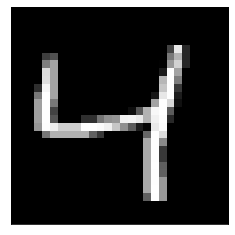

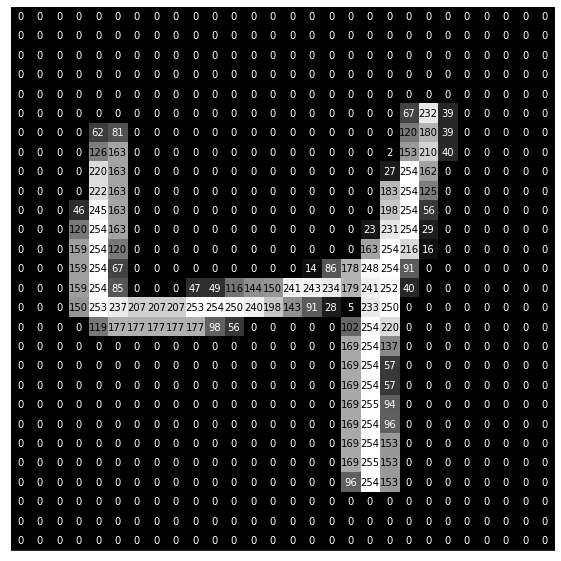

In [22]:
plt.imshow(X_train[2], cmap='gray')
plt.xticks(())
plt.yticks(())
plt.show()


visualize_image(X_train[2], 10, 10)

## MNIST: True Living Space

From the above 2D pixel matrix we observe that although the image dimension is 784 (28 x 28), **only a small fraction of the pixels are non-zero**. A large majority of the pixel locations, which constitute the background, are zeros. All images share the same background (shown below).

- Therefore, the true living space of MNIST images is low-dimensional.



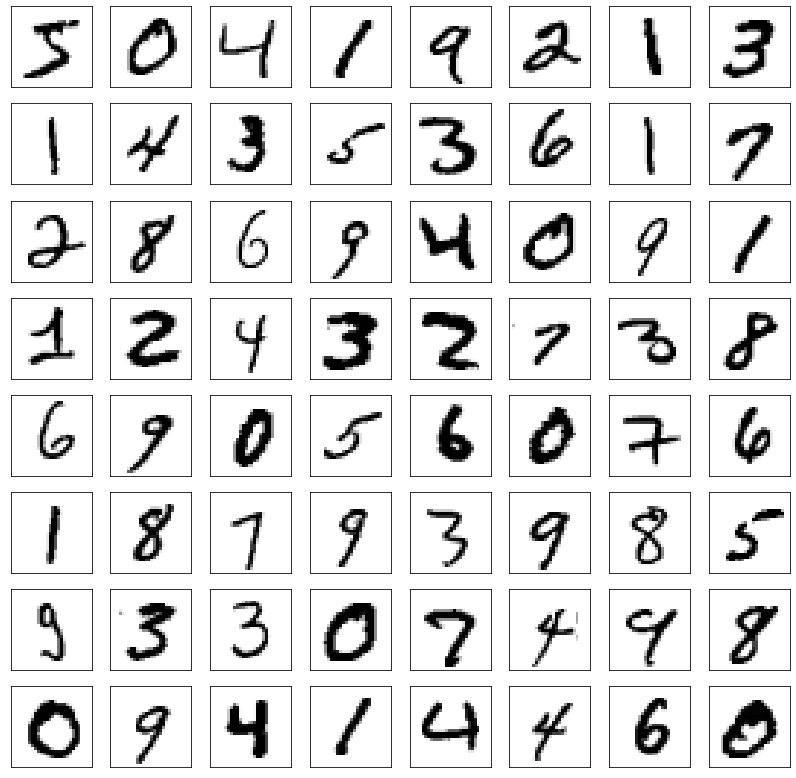

In [23]:
plt.figure(figsize=(14,14))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

## CIFAR-10: Load the Dataset

In [24]:
(X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = keras.datasets.cifar10.load_data()

print("\nNo. of Training Samples: ", X_train_cifar.shape)
print("No. of Training Labels: ", y_train_cifar.shape)

print("\nNo. of Testing Samples: ", X_test_cifar.shape)
print("No. of Testing Labels: ", y_test_cifar.shape)


No. of Training Samples:  (50000, 32, 32, 3)
No. of Training Labels:  (50000, 1)

No. of Testing Samples:  (10000, 32, 32, 3)
No. of Testing Labels:  (10000, 1)


## CIFAR-10: Visualize a RGB Image and its Three 2D Pixel Matrices

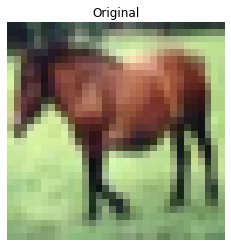

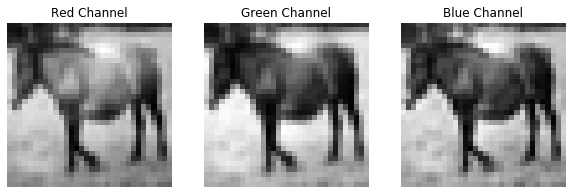

In [25]:
image_index_cifar = 7

plt.imshow(X_train_cifar[image_index_cifar], cmap='gray', interpolation="nearest")
plt.title("Original")
plt.axis("off")
plt.show()


plt.figure(figsize = (10, 10)) 
plt.subplot(131)
plt.imshow(X_train_cifar[image_index_cifar][:, :, 0], cmap='gray', interpolation="nearest")
plt.title("Red Channel")
plt.axis("off")

plt.subplot(132)
plt.imshow(X_train_cifar[image_index_cifar][:, :, 1], cmap='gray', interpolation="nearest")
plt.title("Green Channel")
plt.axis("off")

plt.subplot(133)
plt.imshow(X_train_cifar[image_index_cifar][:, :, 2], cmap='gray', interpolation="nearest")
plt.title("Blue Channel")
plt.axis("off")
plt.show()

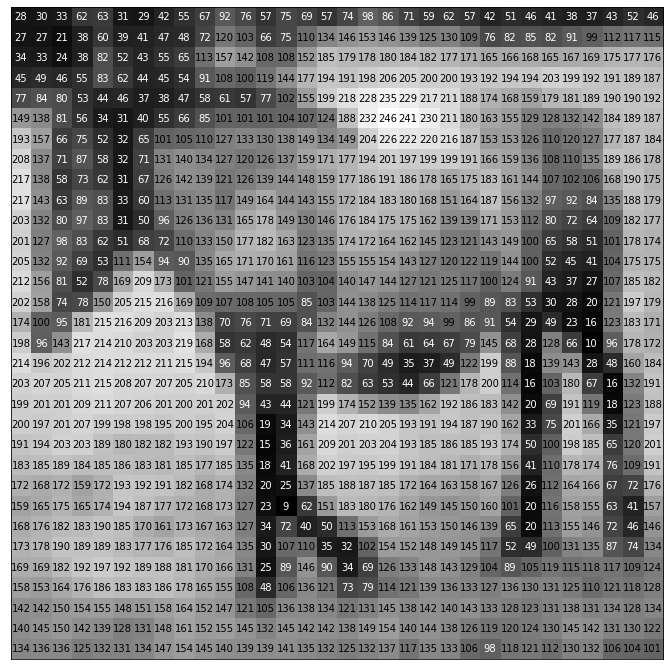

In [26]:
visualize_image(X_train_cifar[image_index_cifar], 12, 12, color_channel=0)

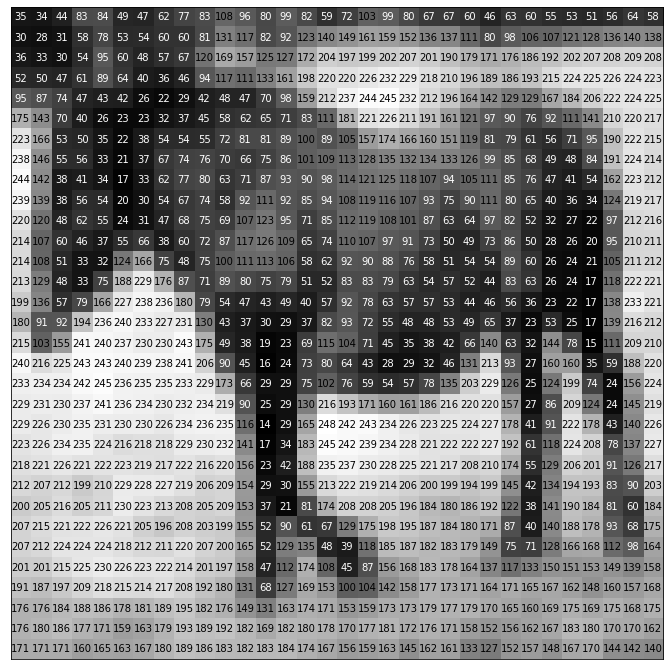

In [27]:
visualize_image(X_train_cifar[image_index_cifar], 12, 12, color_channel=1)

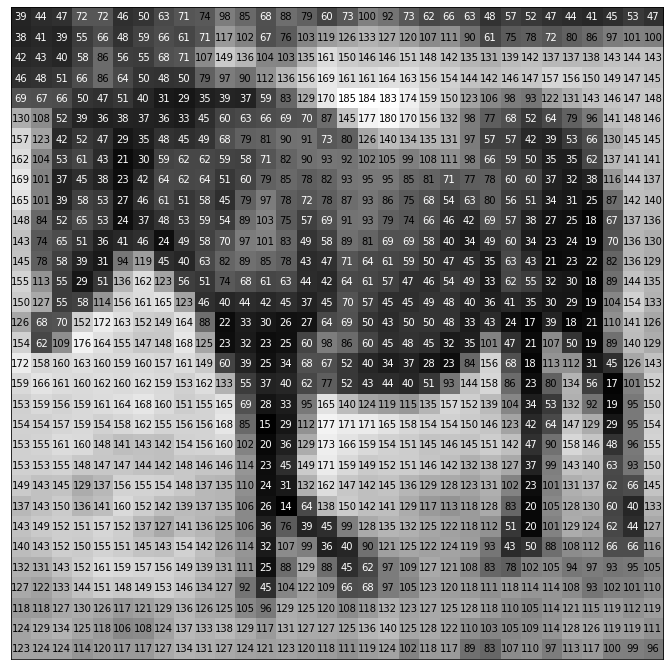

In [28]:
visualize_image(X_train_cifar[image_index_cifar], 12, 12, color_channel=2)

## CIFAR-10: True Living Space

From the above three 2D pixel matrices we observe that all pixel locations have non-zero values. By analyzing the background of the CIFAR-10 images (shown below), we find that the background of the images vary. It indicates that the images occupy the entire pixel space, i.e., images are 3072-dimensional (32 x 32 x 3).

- Therefore, the true living space of CIFAR-10 images is high-dimensional.

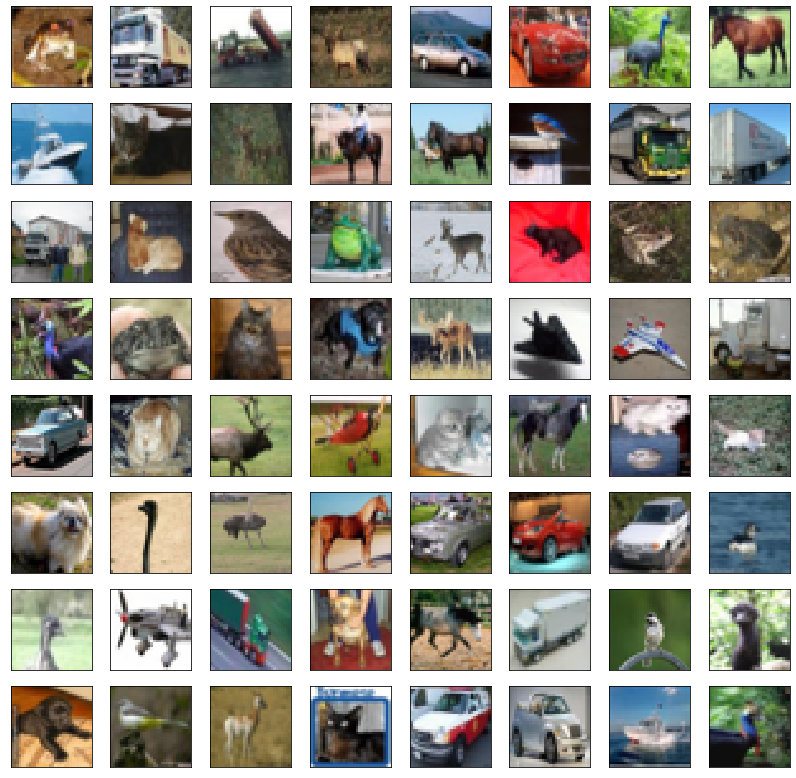

In [29]:
plt.figure(figsize=(14,14))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_cifar[i], cmap=plt.cm.binary)
plt.show()